In [17]:
import networkx as nx
import syft as sy
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(40, 20))
import pprint

from syft.service.action.action_graph_service import ActionGraphService
from syft.service.action.action_graph import InMemoryActionGraphStore, InMemoryGraphConfig, InMemoryStoreClientConfig
from syft.service.context import AuthedServiceContext
from syft.node.credentials import SyftSigningKey
from syft.service.action.action_graph import Action, NodeActionData, NodeActionDataUpdate
from syft.service.action.action_graph import ActionStatus
from syft.service.action.numpy import NumpyArrayObject, ActionObject


print(sy.__version__)

0.8.0-beta.8


<Figure size 4000x2000 with 0 Axes>

In [2]:
store_config = InMemoryGraphConfig()
store_config

InMemoryGraphConfig(store_type=<class 'syft.service.action.action_graph.NetworkXBackingStore'>, client_config=InMemoryStoreClientConfig(filename='action_graph.bytes', path='/tmp'), locking_config=NoLockingConfig(lock_name='syft_lock', namespace=None, expire=60, timeout=30, retry_interval=0.1))

In [3]:
graph_store = InMemoryActionGraphStore(store_config=store_config)

In [4]:
graph_store.store_config

InMemoryGraphConfig(store_type=<class 'syft.service.action.action_graph.NetworkXBackingStore'>, client_config=InMemoryStoreClientConfig(filename='action_graph.bytes', path='/tmp'), locking_config=NoLockingConfig(lock_name='syft_lock', namespace=None, expire=60, timeout=30, retry_interval=0.1))

In [5]:
action_graph_service = ActionGraphService(store=graph_store)

In [6]:
signing_key = SyftSigningKey.generate()
verify_key = signing_key.verify_key
authed_context = AuthedServiceContext(credentials=signing_key.verify_key)

In [7]:
signing_key.verify_key == authed_context.credentials

True

In [8]:
action_obj_a = ActionObject.from_obj([1, 2, 3])
action_obj_b = ActionObject.from_obj([2, 3, 4])

In [9]:
action_obj_a.id

<UID: 15ac640e96b64044a34c8327e21a7b8c>

In [10]:
action1 = Action(
    path="action.execute",
    op="np.array",
    remote_self=None,
    args=[action_obj_a.syft_lineage_id],
    kwargs={}
)
action1

```python
class Action:
  id: str = 480d8c4067d745a8a2de3b50c12c36c7
  path: str = "action.execute"
  op: str = "np.array"
  remote_self: str = None
  args: str = [<LineageID: 15ac640e96b64044a34c8327e21a7b8c - 1202359518488198582>]
  kwargs: str = {}
  result_id: str = 8e20c91d35954c259c22e09b0880d145

```

In [11]:
node_action_data = NodeActionData.from_action(action=action1, 
                                              credentials=verify_key)

In [15]:
node_action_data

```python
class NodeActionData:
  id: str = 480d8c4067d745a8a2de3b50c12c36c7
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-21 20:15:20
  updated_at: str = None
  user_verify_key: str = c762a518cc182f257a7fa01e6c9d319cf228eec3e0763d025e93bb0653417e77

```

In [33]:
node_action_update = NodeActionDataUpdate()
import syft
isinstance(node_action_update.updated_at, syft.types.datetime.DateTime)

True

In [10]:
action2 = Action(
    path="action.execute",
    op="np.array",
    remote_self=None,
    args=[action_obj_b.syft_lineage_id],
    kwargs={}
)
action2

```python
class Action:
  id: str = ba37cdcec0d7407f8d423ea671c7607c
  path: str = "action.execute"
  op: str = "np.array"
  remote_self: str = None
  args: str = [<LineageID: 7dd9d733a433453f8612acc861d2cb06 - 1504596336701142305>]
  kwargs: str = {}
  result_id: str = d05deb2383484912aa053fa3c0016b6e

```

In [11]:
action_graph_service.add_action(context=authed_context, action=action1)

```python
class NodeActionData:
  id: str = 369946b061ce42a3807506015b906d4d
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-21 19:42:21
  updated_at: str = None
  user_verify_key: str = 4f46f70b243bacac4877c832a05fcce60bf67038ed2ef613a186fe7e6209231f

```

In [12]:
action_graph_service.add_action(context=authed_context, action=action2)

```python
class NodeActionData:
  id: str = ba37cdcec0d7407f8d423ea671c7607c
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-21 19:42:21
  updated_at: str = None
  user_verify_key: str = 4f46f70b243bacac4877c832a05fcce60bf67038ed2ef613a186fe7e6209231f

```

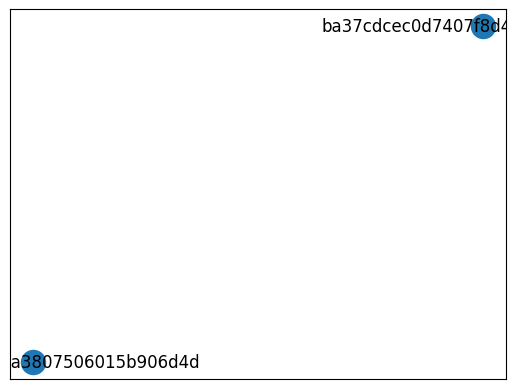

In [13]:
action_graph_service.store.graph.visualize()

In [14]:
action_res = Action(
    path="action.execute",
    op="__add__",
    remote_self=action1.result_id,
    args=[action2.result_id],
    kwargs={}
)
action_res

```python
class Action:
  id: str = eb6d8c1e8f7f4dd4850bfe85d819ac11
  path: str = "action.execute"
  op: str = "__add__"
  remote_self: str = 446ccffb842a4e04a44d00d03f5b5c16
  args: str = [<LineageID: d05deb2383484912aa053fa3c0016b6e - 933538972540580919>]
  kwargs: str = {}
  result_id: str = 83fcb4dbdff1458d8d57e96cbfd3ce06

```

In [15]:
action_graph_service.add_action(context=authed_context, action=action_res)

```python
class NodeActionData:
  id: str = eb6d8c1e8f7f4dd4850bfe85d819ac11
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-21 19:42:33
  updated_at: str = None
  user_verify_key: str = 4f46f70b243bacac4877c832a05fcce60bf67038ed2ef613a186fe7e6209231f

```

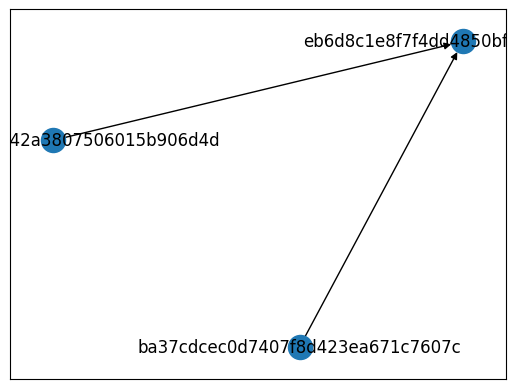

In [16]:
# plt.figure(figsize=(20, 10))
action_graph_service.store.graph.visualize()

In [17]:
action_res_2 = Action(
    path="action.execute",
    op="__mul__",
    remote_self=action_res.result_id,
    args=[action2.result_id],
    kwargs={}
)
action_res

```python
class Action:
  id: str = eb6d8c1e8f7f4dd4850bfe85d819ac11
  path: str = "action.execute"
  op: str = "__add__"
  remote_self: str = 446ccffb842a4e04a44d00d03f5b5c16
  args: str = [<LineageID: d05deb2383484912aa053fa3c0016b6e - 933538972540580919>]
  kwargs: str = {}
  result_id: str = 83fcb4dbdff1458d8d57e96cbfd3ce06

```

In [18]:
action_graph_service.add_action(context=authed_context, action=action_res_2)

```python
class NodeActionData:
  id: str = 4e4dc5dcde46450cabe47b7a912a361a
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-21 19:42:57
  updated_at: str = None
  user_verify_key: str = 4f46f70b243bacac4877c832a05fcce60bf67038ed2ef613a186fe7e6209231f

```

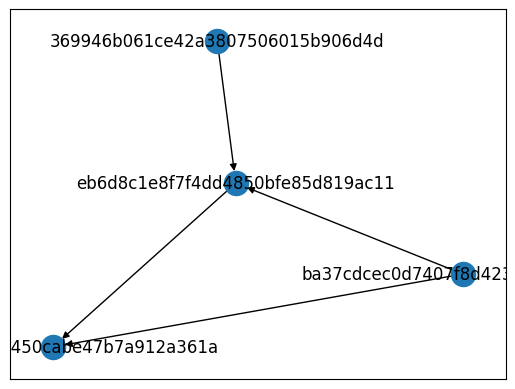

In [19]:
action_graph_service.store.graph.visualize()

In [20]:
action_graph_service.get_by_action_status(context=authed_context, status=ActionStatus.PROCESSING)

,type,id
0,<UID: 369946b061ce42a3807506015b906d4d>,None
1,<UID: ba37cdcec0d7407f8d423ea671c7607c>,None
2,<UID: eb6d8c1e8f7f4dd4850bfe85d819ac11>,None
3,<UID: 4e4dc5dcde46450cabe47b7a912a361a>,None


In [21]:
action_graph_service.get_by_verify_key(context=authed_context, verify_key=signing_key.verify_key)

,type,id
0,<UID: 369946b061ce42a3807506015b906d4d>,None
1,<UID: ba37cdcec0d7407f8d423ea671c7607c>,None
2,<UID: eb6d8c1e8f7f4dd4850bfe85d819ac11>,None
3,<UID: 4e4dc5dcde46450cabe47b7a912a361a>,None
